<h1><center>NLP : Movie Critics</center></h1>
<h2><center>Part 2 : WordCloud</center></h2>

<center><img src="https://simplonline.co/_next/image?url=https%3A%2F%2Fsimplonline-v3-prod.s3.eu-west-3.amazonaws.com%2Fmedia%2Fimage%2Fjpg%2F1dea9fa5-b2da-4731-925d-b2280a28af3e.jpg&w=1280&q=75" alt="iIllustration" title="title"  style="object-fit:cover; width:800px; height:250px;"/></center>

------------------
------------------

</br>
<center><h2>Working Environment Preparation</h2></center>

In [52]:
# Import Libraries
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from collections import Counter
from PIL import Image
from tqdm import tqdm
from wordcloud import WordCloud, ImageColorGenerator


warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [75]:
# Loading set for WordCloud
x_train = joblib.load('train_test_split_save_joblib/preprocessing_no_lem_sc.joblib')['x_train']
y_train = joblib.load('train_test_split_save_joblib/preprocessing_no_lem_sc.joblib')['y_train']

In [76]:
# Decompose the tokenization to have a sentence
for i, comment in x_train.iteritems():
    x_train[i] = ' '.join(comment)

---------------------
---------------------

<h2><center> WordCloud : General Comments</center></h2>

In [77]:
# Generate a text with all comments
general = ' '.join(x_train)

In [78]:
# Stopwords : actors, producer, characters, movie name, and litte words..
gen_stopwords = ['jim', 'carry', 'dragon', 'ball', 'knuckles', 'christopher', 
                'nolan', 'cameron', 'james', 'tonic', 'avatar', 'inception', 
                'san', 'dicaprio', 'pandore', 'avoir', 'être', 'aussi', 'alors', 
                'donc', 'quand', 'aprè', 'après', 'cest', 'quel', 'celui', 
                'cela', 'eggman', 'comme', 'joseph', 'rothwell','gordon', 
                'levitt', 'tom', 'harry', 'sonic', 'hedgehog', 'hawaii',
                'mario', 'natasha', 'quéquette', 'madeleine', 'oozaru', 
                'robotnik', 'lewitt', 'robotnick', 'following', 'schtroumpf',
                'bite', 'zizi', 'naviis', 'emerald', 'emerald', 'emeralds', 
                'penis', 'egg', 'mass', 'bienun', 'aubergine', 'eywa',
                'shadowles', 'bistouquette', 'roue','iris', 'augustine', 'aldous',
                'spoiler', 'orwell', 'saucisse', 'dbzet', 'emeraldspoiler', 
                'knukles', 'jeff', 'fowler', 'picolo', 'fox', 'émeraudes',
                'power', 'rangers', 'ariane', 'hérison', 'robotniks', 'saito'
                'cobbs', 'huxley', 'echidné']

#### Masking Preparation

In [79]:
##---- Masking ----##
icn_chat = np.array(Image.open('../img/chat.png'))      # Open the file

# transform the background color of image black to white
def transform_zeros(val):
    if val == 0: 
       return 255
    else:
       return val

# Create the same shape np.array
maskable_image = np.ndarray((icn_chat.shape[0],icn_chat.shape[1]), np.int32)

# transform
for i in range(len(icn_chat)):
    maskable_image[i] = list(map(transform_zeros, icn_chat[i]))

icn_chat = maskable_image       # Img transform

#### WordCloud

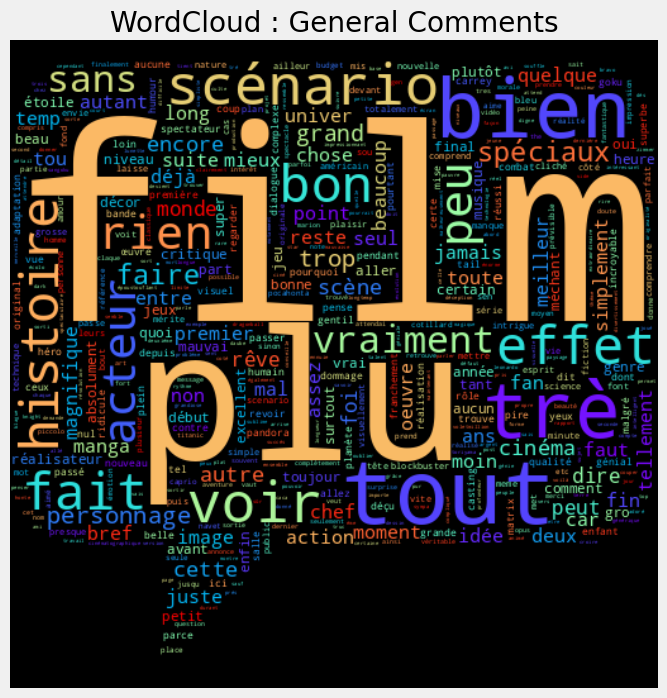

In [80]:
# WordCloud Generate
wordcloud_gen = WordCloud(stopwords=gen_stopwords, background_color='black', 
                          width=1800, height=1000, colormap='rainbow', 
                          max_font_size=500, mask=icn_chat, max_words=1000, 
                          min_word_length=3, random_state=42, 
                          collocations=False).generate(general)

# Display figure
plt.figure(figsize=(24,8))
plt.axis("off")
plt.title("WordCloud : General Comments")
plt.imshow(wordcloud_gen, interpolation='bilinear')
plt.show()

-----------------
-----------------

## Delete common words of positive and negative comments

In [81]:
comm_pos = ' '.join(x_train[y_train == 1])    # for Positive comments
comm_neg = ' '.join(x_train[y_train == 0])    # for Negative Comments

In [82]:
positive = set(comm_neg.split())
negative = set(comm_pos.split())

# Create list of common stopwords 
common_stopwords = list(positive.intersection(negative))

stopwords = gen_stopwords + common_stopwords

---------------------
---------------------

<h2><center> WordCloud : Positive Comments</center></h2>

#### Masking Preparation

In [83]:
##---- Masking ----##
like = np.array(Image.open('../img/like.png'))      # Open the file

#### WordCloud

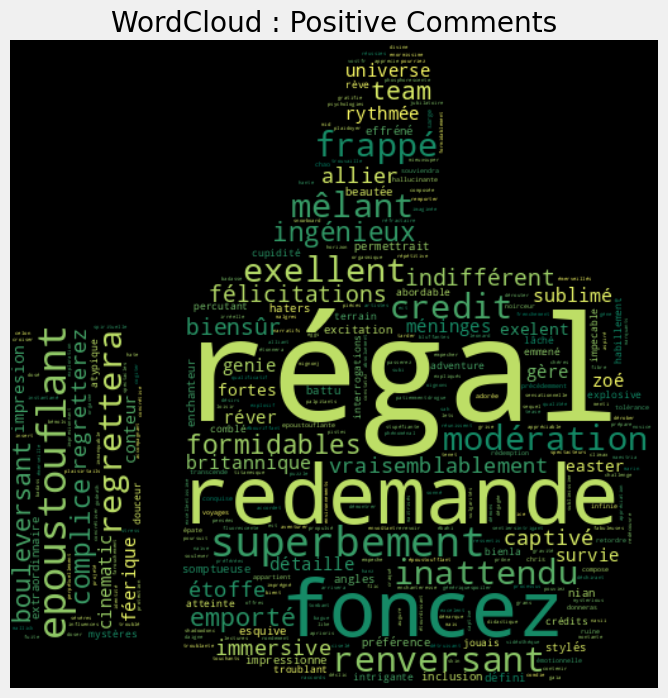

In [84]:
# WordCloud Generate
wordcloud_pos = WordCloud(stopwords=stopwords, background_color='black', 
                      width=1800, height=1000, colormap='summer', 
                      max_font_size=500, mask=like, max_words=500, 
                      min_word_length=3, random_state=42, 
                      collocations=False).generate(comm_pos)

# Display figure
plt.figure(figsize=(12,8))
plt.axis("off")
plt.title("WordCloud : Positive Comments")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.show()

--------------------
--------------------

<h2><center> WordCloud : Negative Comments</center></h2>

#### Masking Preparation

In [85]:
##---- Masking ----##
dislike = np.array(Image.open('../img/dislike.png'))      # Open the file

#### WordCloud

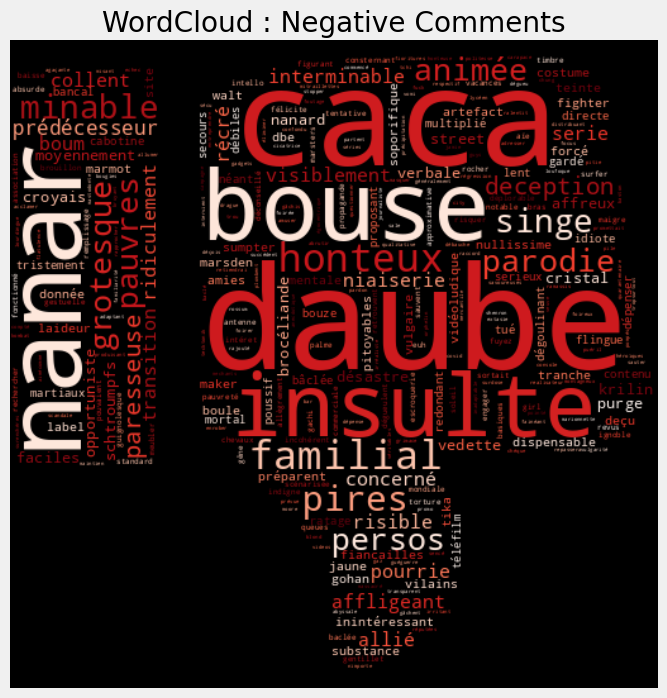

In [86]:
# WordCloud Generate
wordcloud_neg = WordCloud(stopwords=stopwords, background_color='black', 
                      width=1800, height=1000, colormap='Reds', 
                      max_font_size=500, mask=dislike, max_words=1000, 
                      min_word_length=2, random_state=42, 
                      collocations=False).generate(comm_neg)

# Display figure
plt.figure(figsize=(24,8))
plt.axis("off")
plt.title("WordCloud : Negative Comments")
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.show()